# Peak quality classification
In this document, a peak classifier is trained based on data from the FAME saliva analysis.
The model is evaluated on a test set of the FAME saliva data and on an external set coming from the FGFP fecal metabolomics.

## Data loading
Data is loaded and inspected.

In [177]:
import sys
sys.version_info


sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/pvgeende/OneDrive - UGent/Documents/publications/tardis_paper/data/quality_analysis/fame_feat_labeled.csv")

In [3]:
data = data[["AUC","SNR","peak_cor","pop","Rating"]]

In [4]:
data

,AUC,SNR,peak_cor,pop,Rating
0,5.268505e+05,5.724095,0.930479,8.194030,Good
1,1.089761e+06,8.306172,0.710482,14.410448,Ambiguous
2,9.598806e+05,12.654109,0.945706,14.014925,Ambiguous
3,1.491169e+06,3.115002,0.128676,12.738806,Bad
4,1.600062e+04,3.150384,0.512800,8.649254,Bad
...,...,...,...,...,...
314,1.678497e+04,4.062024,0.899512,6.967742,Bad
315,9.813691e+05,8.236773,0.946165,10.458647,Good
316,4.609921e+04,3.627268,0.673865,7.953125,Bad
317,6.160932e+05,11.594717,0.982747,9.470149,Good


In [5]:
data["Rating"].value_counts()

Good         163
Bad          110
Ambiguous     46
Name: Rating, dtype: int64

## Model training

Using Pycaret, different machine learning models are trained and evaluated.
The best model is selected for further evaluation.

In [6]:
from pycaret.classification import *
s = setup(data, target = 'Rating', session_id = 123,train_size = 0.7)

,Description,Value
0,Session id,123
1,Target,Rating
2,Target type,Multiclass
3,Target mapping,"Ambiguous: 0, Bad: 1, Good: 2"
4,Original data shape,"(319, 5)"
5,Transformed data shape,"(319, 5)"
6,Transformed train set shape,"(223, 5)"
7,Transformed test set shape,"(96, 5)"
8,Numeric features,4
9,Preprocess,True


In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8883,0.9575,0.8883,0.8923,0.8813,0.8096,0.8167,0.0660
et,Extra Trees Classifier,0.8745,0.9621,0.8745,0.8702,0.8630,0.7840,0.7915,0.0520
gbc,Gradient Boosting Classifier,0.8573,0.9497,0.8573,0.8622,0.8504,0.7606,0.7675,0.0870
lightgbm,Light Gradient Boosting Machine,0.8563,0.9570,0.8563,0.8642,0.8525,0.7573,0.7631,0.1430
dt,Decision Tree Classifier,0.8300,0.8751,0.8300,0.8407,0.8300,0.7167,0.7225,0.0080
lda,Linear Discriminant Analysis,0.8300,0.9435,0.8300,0.7906,0.7960,0.7038,0.7212,0.0080
ridge,Ridge Classifier,0.8211,0.0000,0.8211,0.7124,0.7594,0.6799,0.7083,0.0100
ada,Ada Boost Classifier,0.8170,0.9377,0.8170,0.8397,0.8195,0.7014,0.7109,0.0300
qda,Quadratic Discriminant Analysis,0.7992,0.9381,0.7992,0.8220,0.7971,0.6701,0.6811,0.0120
knn,K Neighbors Classifier,0.6589,0.7786,0.6589,0.6413,0.6471,0.4218,0.4271,0.0220


The best model is a RandomForestClassifier

In [107]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


## Model evaluation

### Evaluation on test data

In [1]:
evaluate_model(best)

NameError: name 'evaluate_model' is not defined

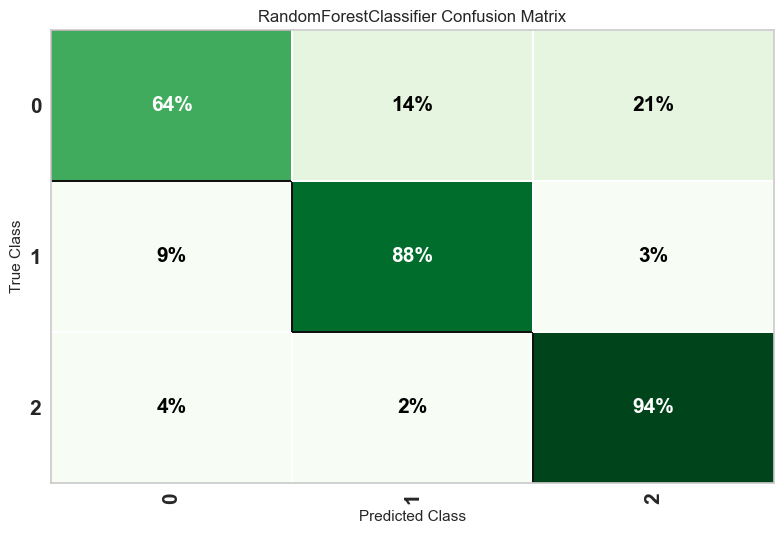

In [11]:
plot_model(best, plot='confusion_matrix',plot_kwargs = {'percent' : True})

In [8]:
test_data = get_config(variable="X_test")
test_data

,AUC,SNR,peak_cor,pop
192,1.122445e+04,4.078288,0.763713,7.267442
231,5.056512e+05,12.250673,0.954707,12.285714
255,6.510298e+06,9.232882,0.945674,13.783582
311,7.959475e+03,3.706822,0.922754,7.000000
117,7.795549e+05,6.689579,0.728355,14.253732
...,...,...,...,...
89,2.710762e+06,4.175828,0.815785,11.126865
312,2.235730e+05,3.761782,0.358288,9.380597
55,4.140472e+06,11.475679,0.962211,9.067164
78,3.643346e+05,11.365378,0.913461,12.485075


In [9]:
test_y = get_config(variable="y_test")
test_y

192          Bad
231         Good
255         Good
311          Bad
117    Ambiguous
         ...    
89     Ambiguous
312          Bad
55          Good
78          Good
81     Ambiguous
Name: Rating, Length: 96, dtype: category
Categories (3, object): ['Ambiguous', 'Bad', 'Good']

In [10]:
predictions = predict_model(best, data = test_data)
predictions

,AUC,SNR,peak_cor,pop,prediction_label,prediction_score
192,1.122445e+04,4.078288,0.763713,7.267442,Bad,0.90
231,5.056512e+05,12.250673,0.954707,12.285714,Good,0.98
255,6.510298e+06,9.232882,0.945674,13.783582,Good,0.93
311,7.959475e+03,3.706822,0.922754,7.000000,Bad,0.91
117,7.795549e+05,6.689579,0.728355,14.253732,Ambiguous,0.89
...,...,...,...,...,...,...
89,2.710762e+06,4.175828,0.815785,11.126865,Ambiguous,0.50
312,2.235730e+05,3.761782,0.358288,9.380597,Bad,0.99
55,4.140472e+06,11.475679,0.962211,9.067164,Good,0.96
78,3.643346e+05,11.365378,0.913461,12.485075,Good,0.81


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predictions["prediction_label"])

0.875

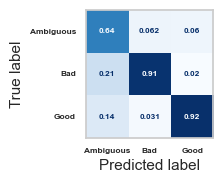

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
font = {'family' : 'arial',
    'weight' : 'bold',
    'size'   : 6}
plt.rc('font', **font)
disp = ConfusionMatrixDisplay.from_predictions(test_y, predictions["prediction_label"],colorbar = False,cmap=plt.cm.Blues,display_labels = None,normalize = "pred")
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.rc('axes', titlesize=6)
plt.grid(b=None)
plt.gcf().set_size_inches(1.66, 1.66)
plt.savefig("confmat_test.png", dpi=300)

### Evaluation on external data

In [14]:
new_data = pd.read_csv("C:/Users/pvgeende/OneDrive - UGent/Documents/publications/tardis_paper/data/quality_analysis/metabo_fgfp_labeled.csv")
new_data = new_data[["AUC","SNR","peak_cor","pop","Rating"]]
correct_labels = new_data[["Rating"]]
new_data.drop('Rating', axis=1, inplace=True)
new_data.head()

,AUC,SNR,peak_cor,pop
0,1.550411e+06,9.157991,0.950110,9.155172
1,7.005290e+07,7.829217,0.791473,12.017241
2,4.622119e+07,13.129390,0.829467,15.982759
3,5.642127e+06,12.538186,0.949624,14.310345
4,5.125975e+07,11.839695,0.932968,14.206897


In [15]:
predictions = predict_model(best, data = new_data)
predictions.head()

,AUC,SNR,peak_cor,pop,prediction_label,prediction_score
0,1.550411e+06,9.157991,0.950110,9.155172,Good,0.70
1,7.005290e+07,7.829217,0.791473,12.017241,Ambiguous,0.51
2,4.622119e+07,13.129391,0.829467,15.982759,Good,0.94
3,5.642127e+06,12.538186,0.949624,14.310345,Good,1.00
4,5.125975e+07,11.839695,0.932968,14.206897,Good,1.00


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(correct_labels, predictions["prediction_label"])

0.6246575342465753

In [141]:
correct_labels.value_counts()


Rating   
Good         130
Bad          125
Ambiguous    110
dtype: int64

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(correct_labels, predictions["prediction_label"])


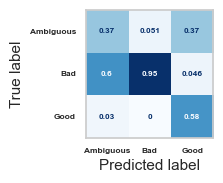

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
font = {'family' : 'arial',
    'weight' : 'bold',
    'size'   : 6}
plt.rc('font', **font)
disp = ConfusionMatrixDisplay.from_predictions(correct_labels, predictions["prediction_label"],colorbar = False,cmap=plt.cm.Blues,normalize = "pred")
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.rc('axes', titlesize=6)
plt.grid(b=None)
plt.gcf().set_size_inches(1.66, 1.66)
plt.savefig("confmat_test.png", dpi=300)